In [6]:
import paho.mqtt.client as mqtt
import subscriber as sb
import publisher as pb
import matplotlib.pyplot as mat
import json
from time import time, sleep

# Initialize of MQTT Protocol
broker_url = "54.180.101.122"
# broker_url = "localhost"
broker_port = 1883

# MQTT 클라이언트 정의
client = mqtt.Client(client_id="play", clean_session=False, userdata=None)

client.connect(broker_url, broker_port)

# Rax = []
# Ray = []
# Raz = []
# scale_x = []
# scale_y = []
# scale_z = []
# flex1 = []
# flex2 = []
# flex3 = []
# flex4 = []
# push = []

# 접속 되었을시에 호출하는 함수
def on_connect(client, userdata, flags, rc):
    client.publish(client, "Hello World")
    print("Hello World")
    print("Connected With Result Code :" + rc)

# Callback 등록 (메세지 올라올때마다 함수 호출)
def callback_data(client, userdata, message):
    print(message.payload.decode())
    y = message.payload.decode()
    # x = json.loads(y)

    # print(y["Acc"])

def callback_state(client, userdata, message):
    callback_state = message.payload.decode()


# To Process Every Other Message
print("Success")
client.on_connect = on_connect

client.message_callback_add("test", callback_data)
client.subscribe("test")

client.loop_forever()



Success
{"Acc":[-45.27,-57.23,86.08],"Gy":[-39.13,30.14,53.7],"Flex":[464,487,458,388]}
{"Acc":[-45.75,-58.6,86.84],"Gy":[-39.68,30.27,53.77],"Flex":[479,496,464,403]}
{"Acc":[-47.24,-57.25,90.2],"Gy":[-39.97,30.45,53.77],"Flex":[477,479,465,401]}
{"Acc":[-48.12,-58.6,92.88],"Gy":[-39.88,30.48,53.71],"Flex":[474,482,455,389]}
{"Acc":[-46.34,-57.18,90.28],"Gy":[-39.79,30.44,53.69],"Flex":[464,483,455,393]}
{"Acc":[-46.37,-58.48,87.8],"Gy":[-39.84,30.45,53.72],"Flex":[474,494,467,408]}
{"Acc":[-46.27,-57.08,89.44],"Gy":[-39.56,30.37,53.72],"Flex":[475,491,464,403]}
{"Acc":[-47.15,-57.94,89.36],"Gy":[-39.48,30.37,53.74],"Flex":[476,495,464,405]}
{"Acc":[-46.63,-58.28,89.12],"Gy":[-39.42,30.36,53.74],"Flex":[474,530,464,400]}
{"Acc":[-46.27,-57.69,89.52],"Gy":[-39.43,30.37,53.72],"Flex":[474,493,464,401]}
{"Acc":[-46.27,-58.52,87.32],"Gy":[-39.44,30.35,53.78],"Flex":[475,496,467,416]}
{"Acc":[-46.8,-57.69,91.92],"Gy":[-39.71,30.46,53.71],"Flex":[474,528,466,403]}
{"Acc":[-47.02,-57.72,90.6

KeyboardInterrupt: 

In [166]:
import collections
import random
import matplotlib.pyplot as plt
plotLength = 5
maxPlotLength = plotLength
numPlots = 3
data = []
counter = 0

for i in range(numPlots):  # give an array for each type of data and store them in a list
    data.append(collections.deque())


print(data)
print(data[0])

[deque([]), deque([]), deque([])]
deque([])


In [172]:
print(range(500))

range(0, 500)


In [180]:
# data[0].append(1)
print(data[0][8])

IndexError: deque index out of range

Text(0, 0.5, 'Accelerometer Output')

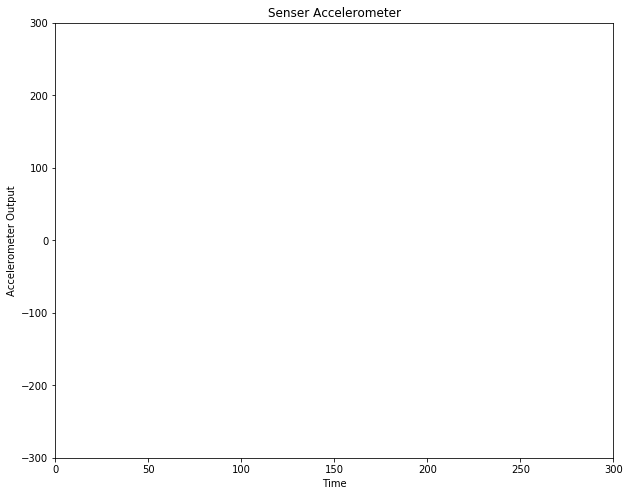

In [87]:
xmin = 0
xmax = maxPlotLength
ymin = -(1)
ymax = 1
fig = plt.figure(figsize=(10, 8))
# ax = plt.axes(xlim=(xmin, xmax), ylim=(float(ymin - (ymax - ymin) / 10), float(ymax + (ymax - ymin) / 10)))
ax = plt.axes(xlim=(xmin, xmax), ylim=(float(-300), float(300)))
ax.set_title('Senser Accelerometer')
ax.set_xlabel("Time")
ax.set_ylabel("Accelerometer Output")
# put our plot onto Tkinter's GUI

In [137]:
lineLabel = ['X', 'Y', 'Z']
style = ['r-', 'c-', 'b-']  # linestyles for the different plots
timeText = ax.text(0.70, 0.95, '', transform=ax.transAxes)
lines = []
lineValueText = []

for i in range(numPlots):
    lines.append(ax.plot([], [], style[i], label=lineLabel[i])[0])
    lineValueText.append(ax.text(0.70, 0.90-i*0.05, '', transform=ax.transAxes))


In [145]:
print(ax.plot([], [], style[0], label=lineLabel[0])[0])

Line2D(X)


In [101]:
for i in range(numPlots):  # give an array for each type of data and store them in a list
    data.append(collections.deque([0] * plotLength, maxlen=plotLength))

isRun = True
isReceiving = False
isGetSenserData = False
thread = None
plotTimer = 0
previousTimer = 0
counter = 0
pltInterval = 500

In [102]:
from tkinter.ttk import Frame

class Window(Frame):
    def __init__(self, figure, master):
        Frame.__init__(self, master)
        self.entry = None
        self.setPoint = None
        self.master = master        # a reference to the master window
        # keep a reference to our serial connection so that we can use it for bi-directional communicate from this class
        self.initWindow(figure)     # initialize the window with our settings

    def initWindow(self, figure):
        self.master.title("Real Time Plot")
        canvas = FigureCanvasTkAgg(figure, master=self.master)
        toolbar = NavigationToolbar2Tk(canvas, self.master)
        canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)

        # create out widgets in the master frame
        lbl1 = Tk.Label(self.master, text="Scaling Factor")
        lbl1.pack(padx=5, pady=5)
        self.entry = Tk.Entry(self.master)
        self.entry.insert(0, '1.0')  # (index, string)
        self.entry.pack(padx=5)
        SendButton = Tk.Button(self.master, text='Send', command=self.sendSerialData)
        SendButton.pack(padx=5)

    def sendSerialData(self):
        print("send~~~~~~~~~~")
        # self.serialConnection.write(data.encode('utf-8'))

In [109]:
import matplotlib.animation as animation
import time
previousTimer = 0

def getSenserData(frame, lines, lineValueText, lineLabel, timeText, pltInterval, ax):
    global previousTimer
    currentTimer = time.perf_counter()
    plotTimer = int((currentTimer - previousTimer) * 1000) # the first reading will be erroneous
    previousTimer = currentTimer
    timeText.set_text('Plot Interval = ' + str(plotTimer) + 'ms')

    #privateData = copy.deepcopy(self.rawData[:])
    if isGetSenserData is True:
        try:
            for i in range(numPlots):
                # data = privateData[(i * self.dataNumBytes):(self.dataNumBytes + i * self.dataNumBytes)]
                # value = struct.unpack(self.dataType, data)
                data[i].append(random.randint(1, 300))

                counter += 1
                lines[i].set_data(range(25), data[i])

                # lines[i].set_data(self.counter, self.data[i])
                ax.set_xlim([0, counter])

                lineValueText[i].set_text('[' + lineLabel[i] + '] = ' + str(data[i]))
        except Exception as ex:
            print("[Error] 데이터 불러오는데 에러가 발생했습니다 : " + str(ex))

IndexError: list index out of range

In [110]:
import tkinter as Tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

root = Tk.Tk()
app = Window(fig, root)

anim = animation.FuncAnimation(fig, getSenserData, fargs=(lines, lineValueText, lineLabel, timeText, pltInterval, ax), interval=pltInterval)
root.mainloop()

In [114]:
print(data)

NameError: name 'data' is not defined